In [ ]:
#import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the csv data into the dataframe
table = pd.read_csv(r"C:\Users\nishi\Downloads\StudentsPerformance.csv")

In [3]:
#display top 5 records of the eataframe
table.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
#display the dimensions of the dataframe
table.shape

(2053, 8)

In [5]:
#copy the dataframe to a new variable 
df=table.copy()

In [6]:
#check for null values
df.isnull().sum()

gender                         3
race/ethnicity                 4
parental level of education    2
lunch                          4
test preparation course        3
math score                     6
reading score                  3
writing score                  5
dtype: int64

In [7]:
#deop null values
df.dropna(inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#check for duplicate values
df.duplicated().sum()

50

In [9]:
#drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1977 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1977 non-null   object 
 1   race/ethnicity               1977 non-null   object 
 2   parental level of education  1977 non-null   object 
 3   lunch                        1977 non-null   object 
 4   test preparation course      1977 non-null   object 
 5   math score                   1977 non-null   float64
 6   reading score                1977 non-null   float64
 7   writing score                1977 non-null   float64
dtypes: float64(3), object(5)
memory usage: 139.0+ KB


In [11]:
#check unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     83
reading score                  79
writing score                  81
dtype: int64

In [12]:
#unique values of categorical data
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [13]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


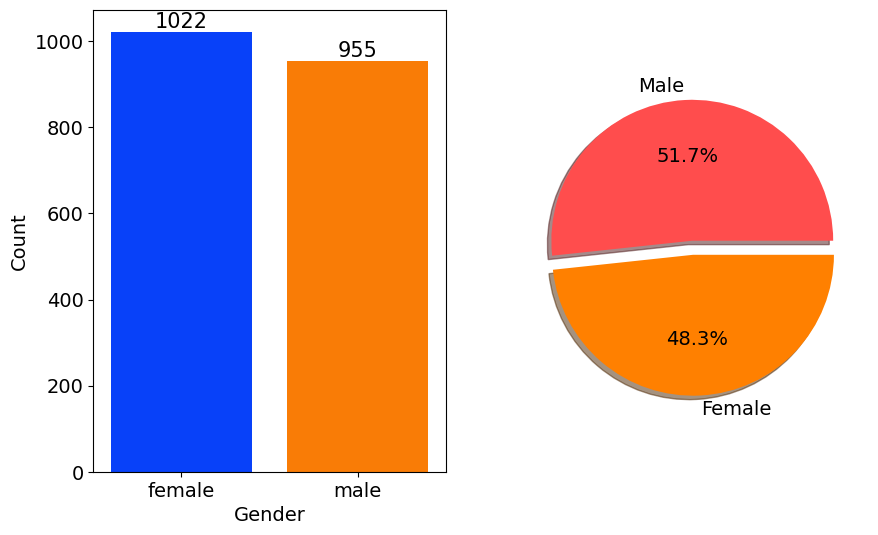

In [14]:
# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(10,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

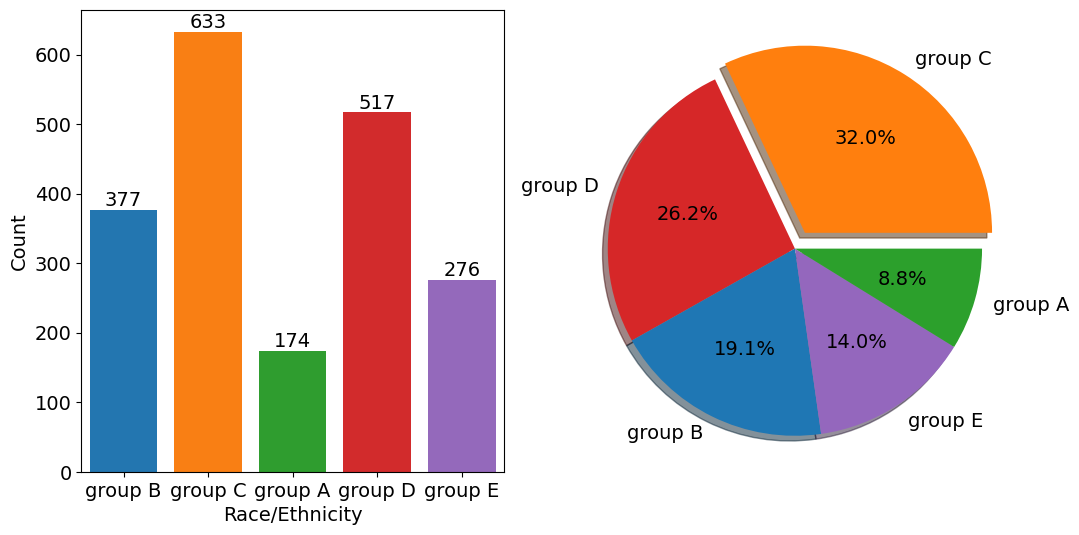

In [15]:
# Define a color palette for the countplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# blue, orange, green, red, purple are respectiively the color names for the color codes used above

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
plt.axis('equal')

# Display the plot
plt.show()

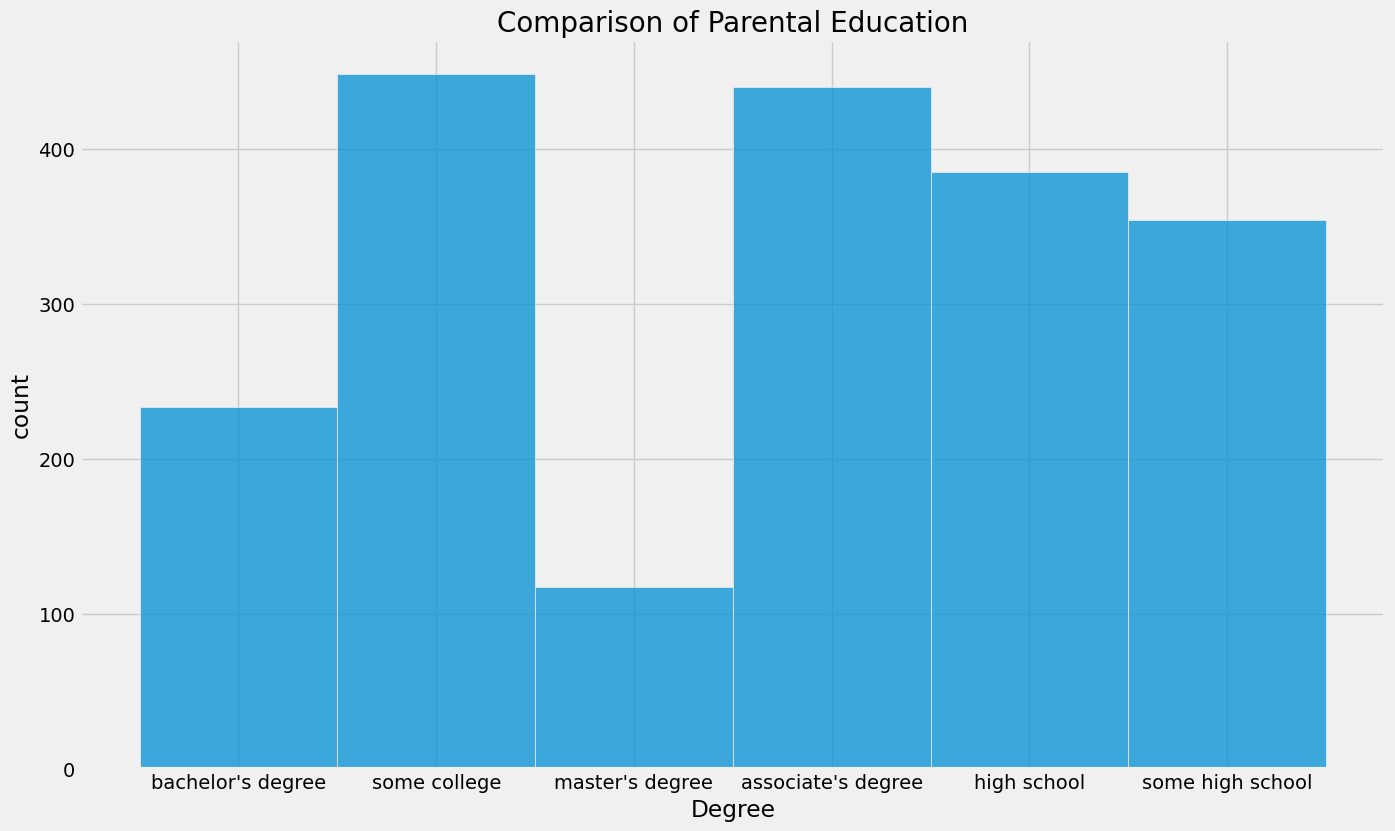

In [16]:
#histogram for parental education
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

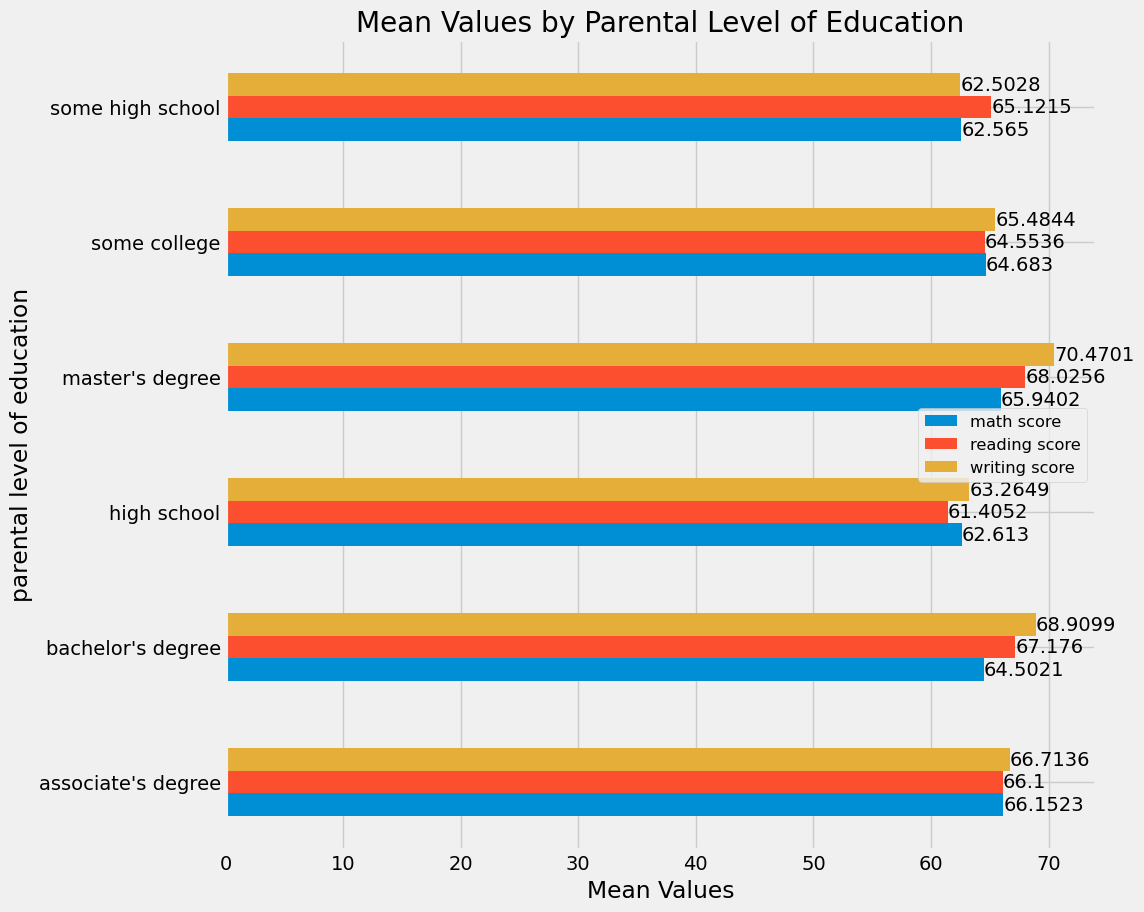

In [17]:
# Assuming df is your DataFrame
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'parental level of education' and calculate the mean of numeric columns
grouped_df = df.groupby('parental level of education')[numeric_columns].mean()

ax = grouped_df.plot(kind='barh', figsize=(10, 10))

# Add value annotations
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Reduce the size of the legend
ax.legend(fontsize='small')

plt.xlabel('Mean Values')
plt.title('Mean Values by Parental Level of Education')
plt.show()


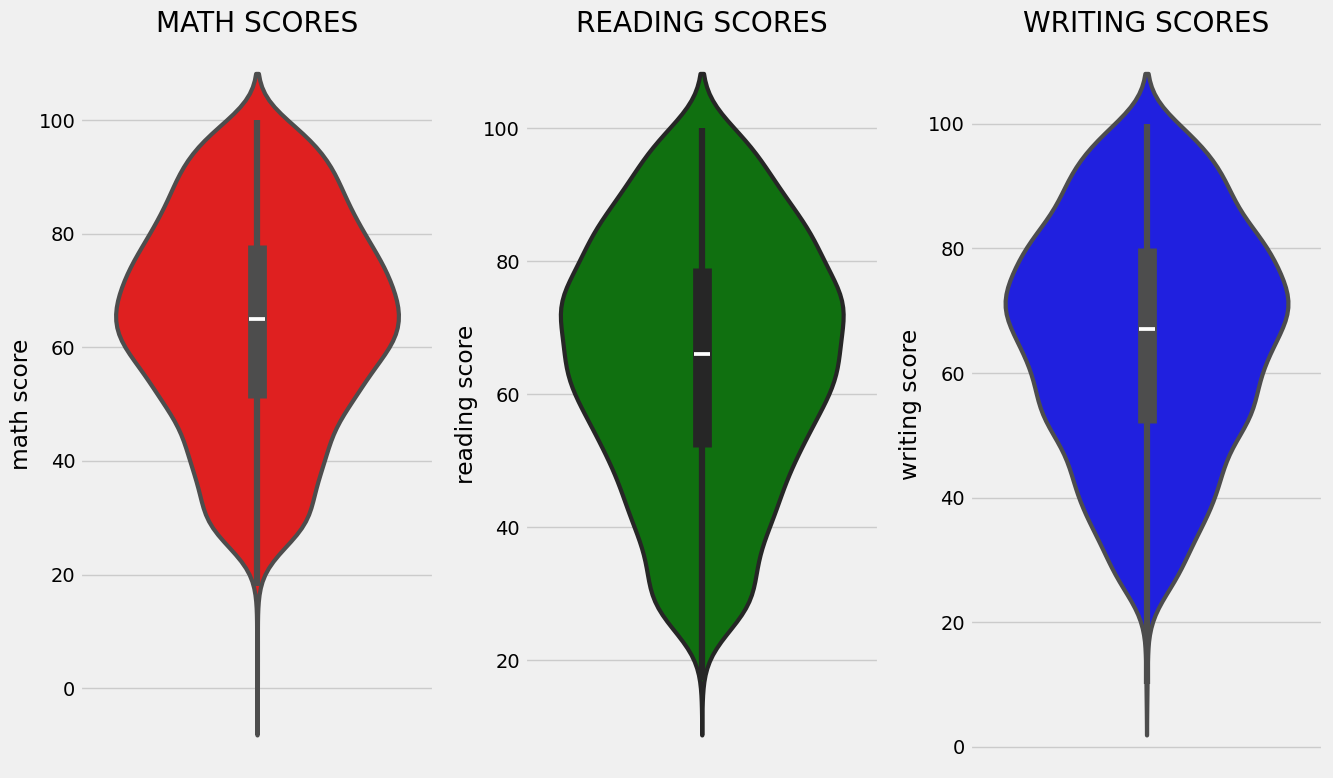

In [18]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Plot the violin plot for math scores
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

# Plot the violin plot for reading scores
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

# Plot the violin plot for writing scores
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

# Display the plots
plt.tight_layout()
plt.show()


(-1.25, 1.25, -1.25, 1.25)

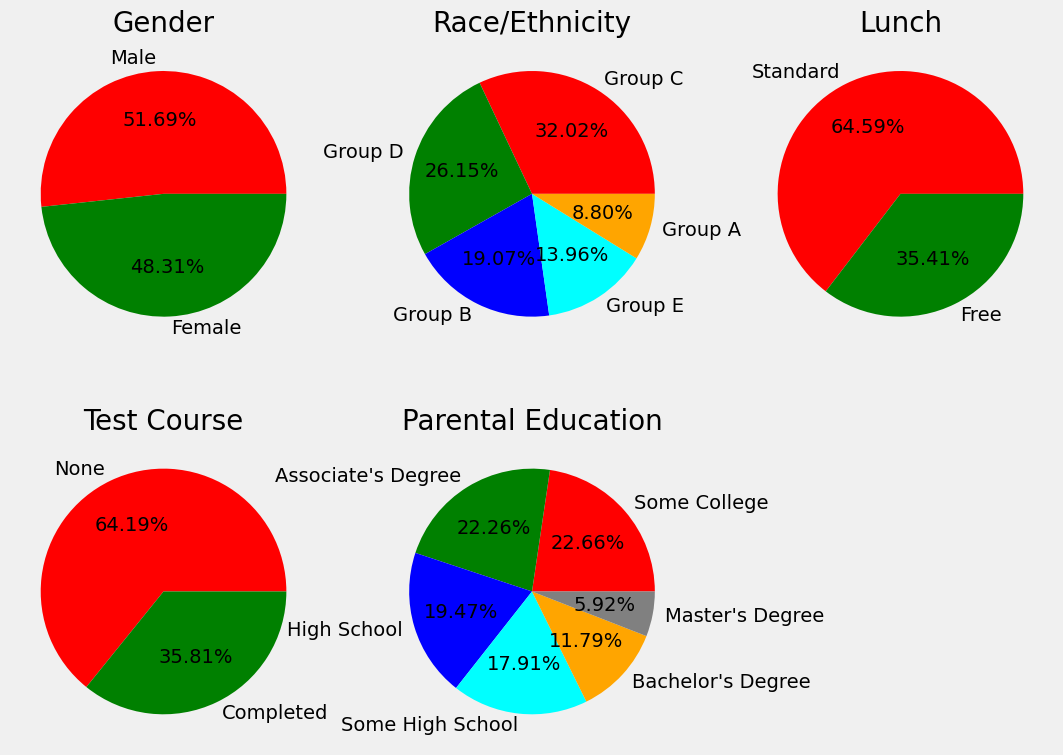

In [19]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Male', 'Female'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

In [20]:
#splitting x variable
X = df.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,74.0
1,female,group C,some college,standard,completed,90.0,88.0
2,female,group B,master's degree,standard,none,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,57.0,44.0
4,male,group C,some college,standard,none,78.0,75.0


In [21]:
#splitting y variable
y = df['math score']
y.head()

0    72.0
1    69.0
2    90.0
3    47.0
4    76.0
Name: math score, dtype: float64

In [22]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
X = preprocessor.fit_transform(X)

In [24]:
X.shape

(1977, 19)

In [25]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1581, 19), (396, 19))

In [26]:
#Evaluates the performance of a regression model using various metrics
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 17.3735
- Mean Squared Error: 301.8375
- Mean Absolute Error: 13.5026
- R2 Score: 0.1235
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18.4070
- Mean Squared Error: 338.8183
- Mean Absolute Error: 14.5243
- R2 Score: 0.1363


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2644
- Mean Squared Error: 0.0699
- Mean Absolute Error: 0.0120
- R2 Score: 0.9998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.5076
- Mean Squared Error: 552.6061
- Mean Absolute Error: 17.1111
- R2 Score: -0.4086




In [28]:
#R2 score
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.136325
1,Decision Tree,-0.408638


In [29]:
#This code demonstrates how to train a linear regression model, make predictions, and calculate the R2 score as a measure of accuracy.
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 13.63


Text(0, 0.5, 'Predicted')

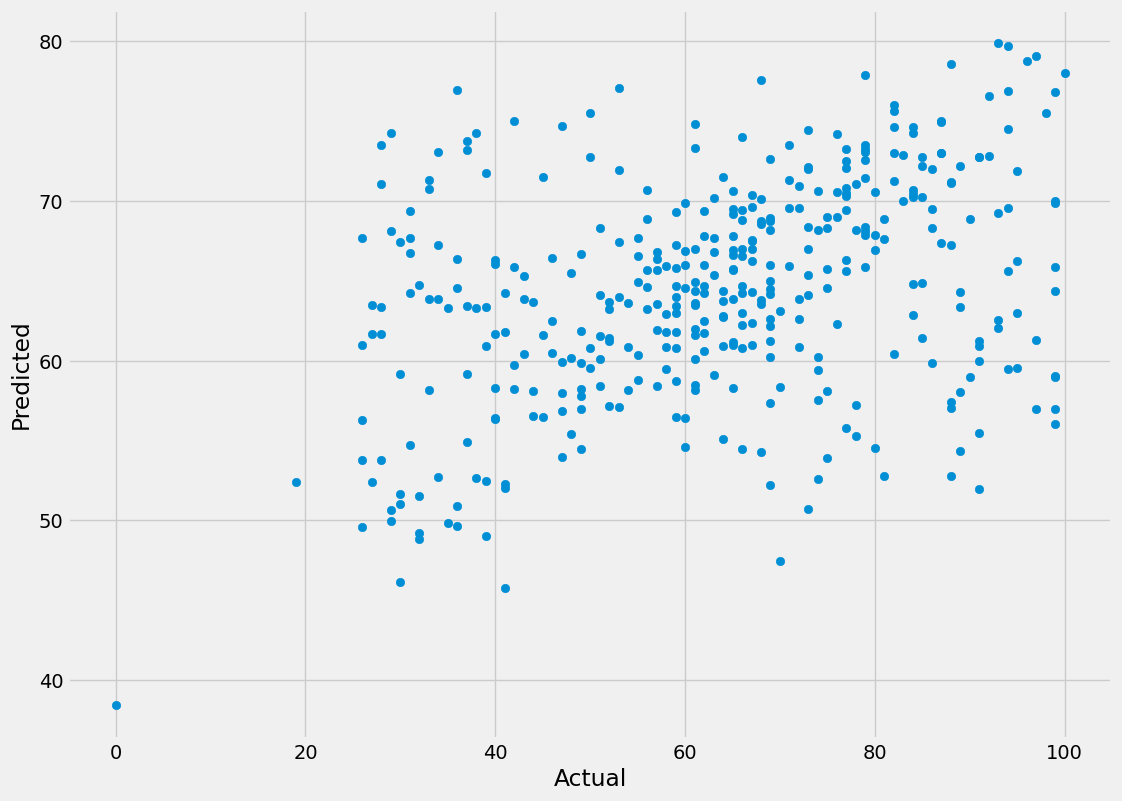

In [30]:
# create a scatter plot to visualize the relationship between actual and predicted values.
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

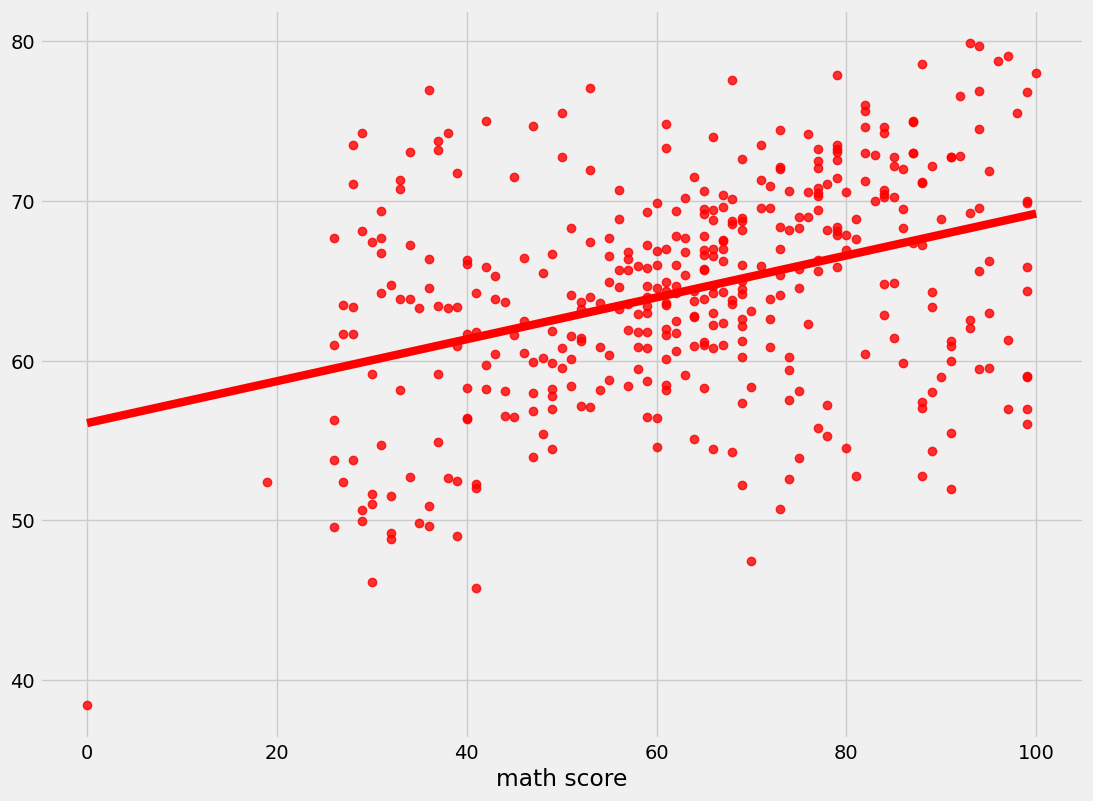

In [31]:
# create a regression plot to visualize the relationship between actual and predicted values, along with the regression line.
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [32]:
#create a DataFrame containing the actual values, predicted values, and the difference between them.
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1842,55.0,66.56250,-11.56250
1904,88.0,57.40625,30.59375
683,29.0,50.62500,-21.62500
351,66.0,64.68750,1.31250
1112,77.0,73.28125,3.71875
...,...,...,...
71,63.0,65.37500,-2.37500
771,75.0,68.28125,6.71875
259,65.0,67.81250,-2.81250
51,77.0,69.40625,7.59375
